In [ ]:
#importing Libraries
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US =df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US ['job_skills']


109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [6]:
df_DA_US [['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [11]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending= False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count',ascending= False).head(10).sort_values(by='median',ascending= False).head(10)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


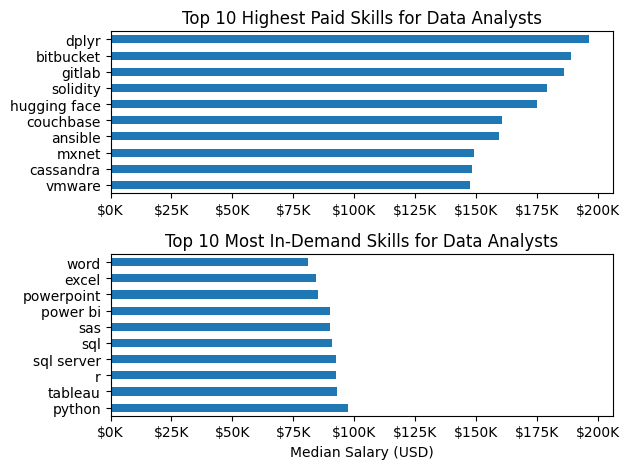

In [17]:
fig , ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind = 'barh', y = 'median' , ax = ax[0],legend= False)
#df_DA_top_pay[::-1].plot(kind = 'barh', y = 'median' , ax = ax[0]) -- For  inverting axis

ax[0].invert_yaxis()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills.plot(kind = 'barh', y = 'median' , ax = ax[1], legend= False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

